# FRAUD TRANSACTION DETECTION

In [1]:
# Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv(r'C:/Users/dahiy/Downloads/Fraud.csv') # load dataset

In [42]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [43]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [48]:
# missing values 
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [46]:
df['isFlaggedFraud'].value_counts() # highly imbalanced data

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [47]:
num_col = df.select_dtypes(include = ['int64', 'float64'])
q1 = num_col.quantile(0.25) #quantiles for numeric value columns
q3 = num_col.quantile(0.75)
IQR = q3 - q1
IQR

step              1.790000e+02
amount            1.953319e+05
oldbalanceOrg     1.073152e+05
newbalanceOrig    1.442584e+05
oldbalanceDest    9.430367e+05
newbalanceDest    1.111909e+06
isFraud           0.000000e+00
isFlaggedFraud    0.000000e+00
dtype: float64

<AxesSubplot: >

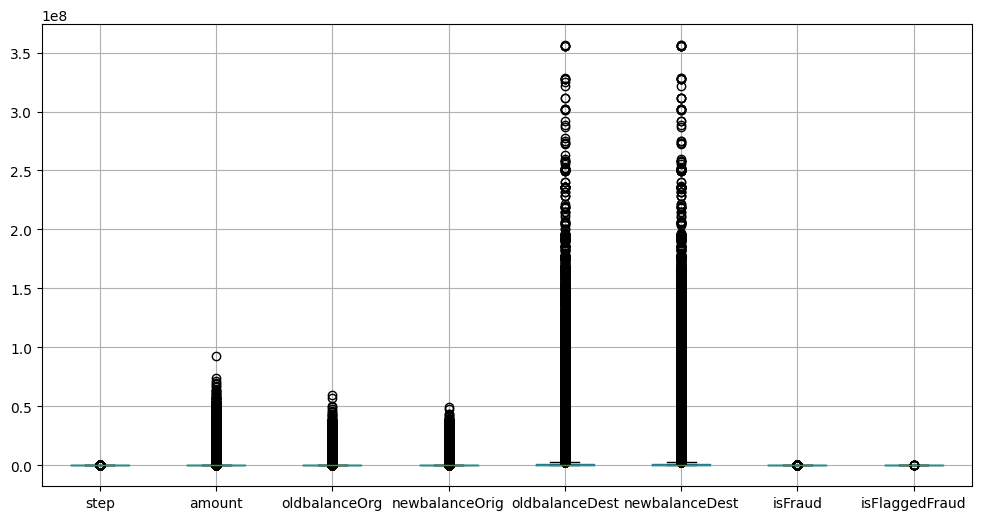

In [9]:
df.boxplot(figsize=(12,6))

In [10]:
def col_outliers(column):
    lower_bound = q1[column] - 1.5 * IQR[column]
    upper_bound = q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df)) * 100
        return column, percentage

In [11]:
columns_with_outliers = [col_outliers(column) for column in num_col.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 1.61%
Column: amount, Percentage of outliers: 5.31%
Column: oldbalanceOrg, Percentage of outliers: 17.49%
Column: newbalanceOrig, Percentage of outliers: 16.56%
Column: oldbalanceDest, Percentage of outliers: 12.36%
Column: newbalanceDest, Percentage of outliers: 11.61%
Column: isFraud, Percentage of outliers: 0.13%
Column: isFlaggedFraud, Percentage of outliers: 0.00%


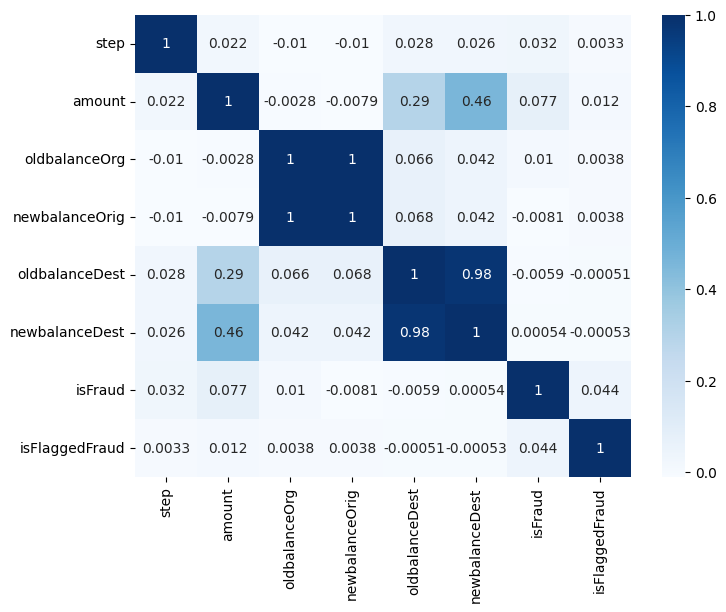

In [12]:
corr_matrix = num_col.corr() # correlation matrix for only numerical columns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap = 'Blues')
plt.show()

##### Since oldbalance and newbalance exhibit high multicollinearity, meaning they carry overlapping information, we'll opt to retain the newer data (newbalance) for its greater relevance to current transactions. This avoids redundancy 

In [52]:
df =df.drop(['step','nameOrig','nameDest','isFlaggedFraud', 'oldbalanceDest', 'oldbalanceOrg'],axis=1) 

# we will drop these variables as they do not have much impact on the target variable

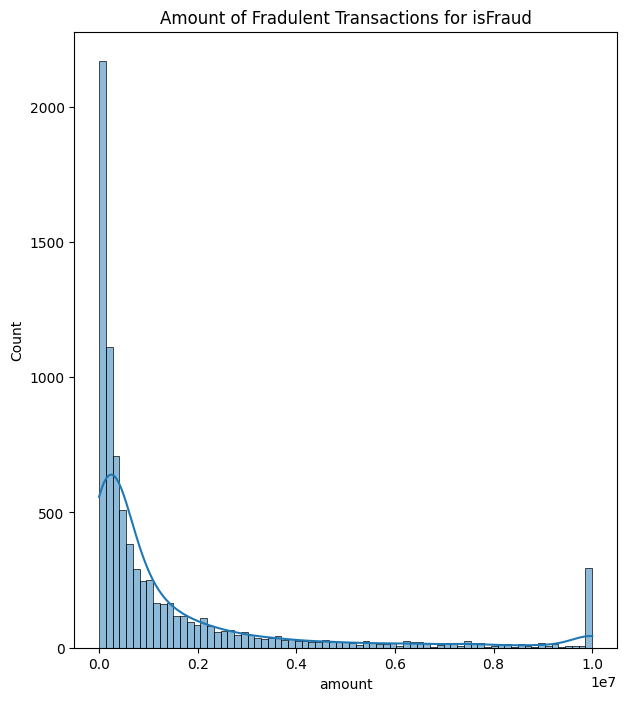

In [53]:
figure = plt.subplots(figsize = (7,8))

sns.histplot(data=df[df['isFraud']==1],x='amount', kde=True)
plt.title('Amount of Fradulent Transactions for isFraud')

plt.show()

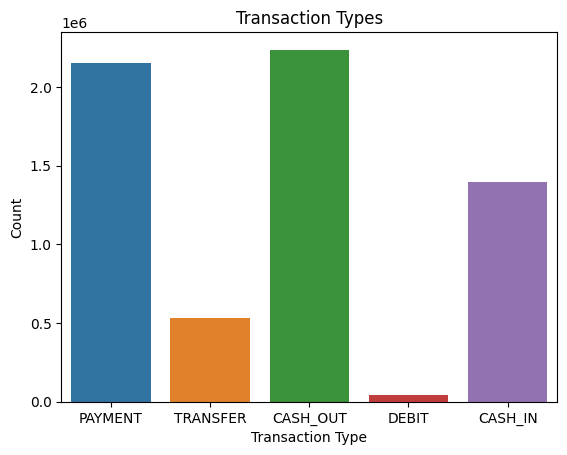

In [54]:
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Types')
plt.show()

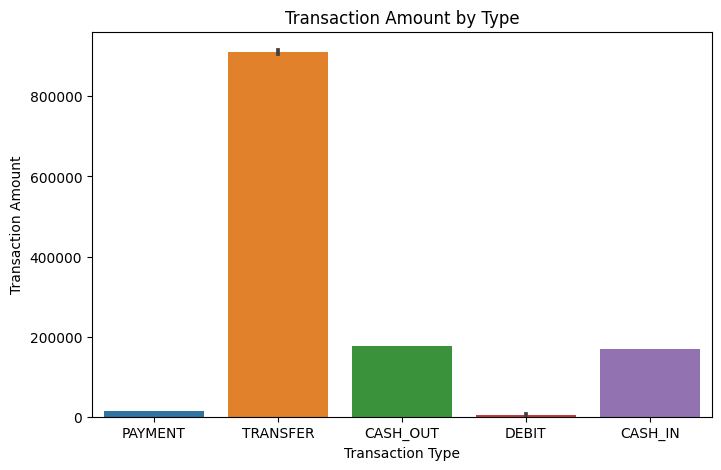

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='type', y='amount')
plt.xticks(rotation=0)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Type')
plt.show()

In [56]:
types = pd.get_dummies(df['type'],prefix='type' , drop_first =True)
types.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [57]:
df = pd.concat([df , types] , axis=1)
df= df.drop('type' , axis =1)
df.head()

,amount,newbalanceOrig,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,160296.36,0.0,0,0,0,1,0
1,1864.28,19384.72,0.0,0,0,0,1,0
2,181.00,0.00,0.0,1,0,0,0,1
3,181.00,0.00,0.0,1,1,0,0,0
4,11668.14,29885.86,0.0,0,0,0,1,0


### TRAIN_TEST SPLIT

In [58]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25 , random_state=42)

### MODEL FITIING

In [59]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train , y_train)

# Predicting the Test Result 
y_pred = model.predict(X_test)


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9993662987888637

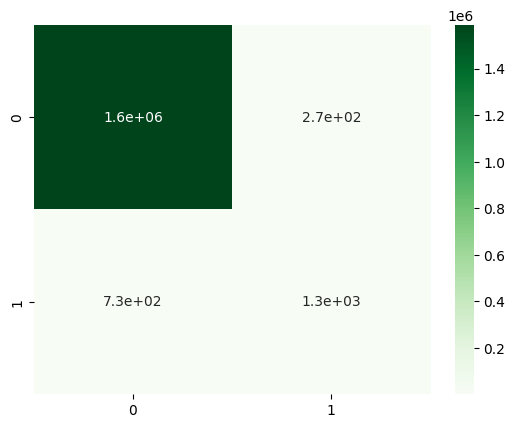

In [62]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test , y_pred),cmap='Greens' ,  annot=True)
plt.show()

In [61]:
# Evaluation Report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred) *100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 99.93662987888638
Precision: 0.8271293375394322
Recall: 0.6410757946210269
F1 Score: 0.7223140495867768
ROC AUC: 0.8204516583972497
Confusion Matrix:
[[1588336     274]
 [    734    1311]]


#### Model Performance and Evaluation
The XGBoost model based on the metrics, exhibits excellent performance across all key metrics.

#### Accuracy: 
Exceptionally high accuracy of 99.93% indicates accurate classification of the vast majority of instances.

#### Precision: 
Outstanding precision of 0.83 signifies a very low rate of false positives, meaning correctly identified positives are highly reliable.

#### Recall: 
Strong recall of 0.64 demonstrates the model effectively captures a significant portion of true positives, minimizing missed positive cases.

#### F1-Score: 
F1-score of 0.72 showcases a well-balanced performance between precision and recall, further solidifying the model's effectiveness.

#### ROC AUC: 
An AUC of 0.82 indicates the model effectively discriminates between positive and negative classes, further confirming its robustness.

#### Confusion Matrix: 
The matrix reveals very few false positives (274) and a substantial number of true positives (1311), highlighting the model's accurate identification of both classes.

In [66]:
y_pred = model.predict(X_test)

In [64]:
# Generate a learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

train_mean = train_mean 
test_mean = test_mean



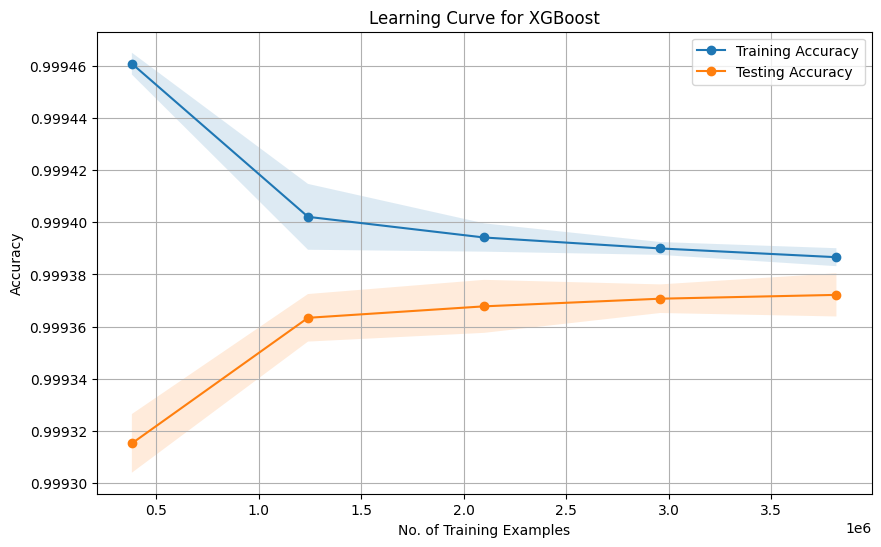

In [65]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('No. of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for XGBoost')
plt.legend(loc='best')
plt.grid()
plt.show()

In [39]:
xtrain = X_train.iloc[:, :len(importance_values)]
print(xtrain.shape) 


(4771965, 7)


In [38]:
importance_values = np.array(list(feature_importances.values())) 
print(importance_values.shape)  


(7,)


In [67]:
feature_importances = model.get_booster().get_score(importance_type='gain')

feature_importance_df = pd.DataFrame({
    'Feature': xtrain.columns,  
    'Importance': feature_importances.values()
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

          Feature  Importance
3  newbalanceDest  139.884674
5      type_DEBIT   91.839104
6    type_PAYMENT   80.788986
1   oldbalanceOrg   65.473450
2  newbalanceOrig   35.865219
0          amount    9.957167
4   type_CASH_OUT    1.856524


1. Data cleaning including missing values, outliers and multi-collinearity. 
There were no null values found in the dataset but there were many outliers as well multicollinearity present in the data.

2. Describe your fraud detection model in elaboration.
I have applied The XGBoost model for fraud transaction detection because the data is highly imbalanced. XGBoost model proves to be effective for imbalaced data and have obtained the evaluation vales mentioned below. Further we can use ensemble methods for futher improvisation of the model to boost model evalaution metrics.

3. How did you select variables to be included in the model?
I dropped two redundant features oldbalanceorg as it can derived from the newbalanceDest + amount therefore removing the high collinearity between the vaibales because they were basically copies of newe Also, I dropped out the "isflaggedfraud" column because it was highly imbalanced and basically contained single category values(not binary). Apart from tis i dropped no significant variables like 'step','nameOrig','nameDest'.

4. Demonstrate the performance of the model by using best set of tools.
using the F1 score, recall score etc we can evaluate the model performance
Accuracy: 99.93662987888638
Precision: 0.8271293375394322
Recall: 0.6410757946210269
F1 Score: 0.7223140495867768
ROC AUC: 0.8204516583972497
Confusion Matrix:
[[1588336     274]
 [    734    1311]]

5. What are the key factors that predict fraudulent customer?
The key factors are new balanceorg, amount of transaction and the type of tansaction which have major impact on detecting the fraudulent transactions.

6. Do these factors make sense? If yes, How? If not, How not?
Yes the factors are absolutely important for fraud detection as they are independent variables without null values and also low collinearity. 

7. What kind of prevention should be adopted while company update its infrastructure?
Ensembling methods could be used for further prevention and building a robust fraud detection model.hyperparameter tuning is also one more method to ensure a boost inthe existing model's performance.

8. Assuming these actions have been implemented, how would you determine if they work?
If the said measures are implemented then the model will be further improvised for more accurate fraud detection proper monitoring and hyperparameter tuning we also automate the fraud detection for incoming transactions in real time.